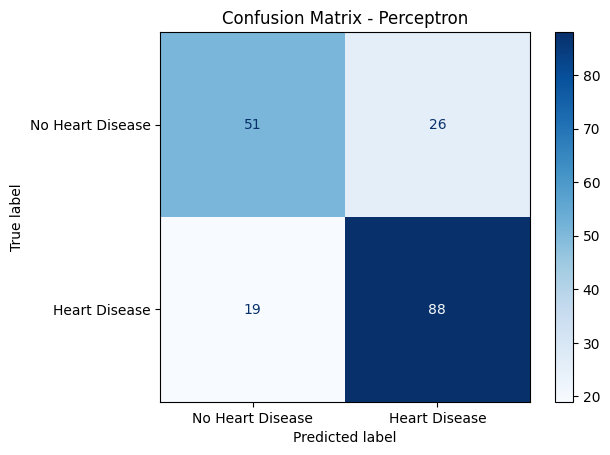

Accuracy (Perceptron): 0.7554347826086957
Classification Report (Perceptron):
                  precision    recall  f1-score   support

No Heart Disease       0.73      0.66      0.69        77
   Heart Disease       0.77      0.82      0.80       107

        accuracy                           0.76       184
       macro avg       0.75      0.74      0.75       184
    weighted avg       0.75      0.76      0.75       184



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'https://raw.githubusercontent.com/mwardeh-png/Intro-to-ML/main/heart%20(1).csv'
data = pd.read_csv(file_path)

# Preparing the data for modeling
# Encoding categorical features
label_encoders = {}
for column in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting data into features and target variable
X = data.drop(columns='HeartDisease')
y = data['HeartDisease']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Perceptron classifier
perceptron_model = Perceptron(max_iter=1000, random_state=42, class_weight='balanced')
perceptron_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_perceptron = perceptron_model.predict(X_test)

# Evaluating the model
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
classification_rep_perceptron = classification_report(y_test, y_pred_perceptron, target_names=["No Heart Disease", "Heart Disease"])

# Displaying the confusion matrix
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
disp_perceptron = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_perceptron, display_labels=["No Heart Disease", "Heart Disease"])
disp_perceptron.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Perceptron")
plt.show()

# Display the classification report and accuracy
print(f"Accuracy (Perceptron): {accuracy_perceptron}")
print("Classification Report (Perceptron):")
print(classification_rep_perceptron)